In [248]:
#Load the sampled data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [249]:
df= pd.read_csv('cleaned_data.csv',low_memory=False) # Se llama el dataset limpio

In [250]:
df.shape

(293710, 41)

In [251]:
df.head()

,back_legroom,body_type,city,city_fuel_economy,daysonmarket,engine_cylinders,engine_displacement,engine_type,franchise_dealer,franchise_make,...,Heated Seats,Navigation System,Sunroof/Moonroof,Remote Start,Leather Seats,Blind Spot Monitoring,Parking Sensors,Adaptive Cruise Control,Third Row Seating,word_count_description
0,35.7,SUV / Crossover,Raynham,26.0,183,I4,1400.0,I4,True,Chevrolet,...,0,0,0,0,0,0,0,0,0,706
1,40.3,SUV / Crossover,Rochester Hills,19.0,130,V6,3200.0,V6,True,Jeep,...,0,0,1,0,0,0,0,0,0,64
2,37.4,Sedan,Tulsa,29.0,44,I4,1800.0,I4,False,Nissan,...,0,0,0,0,0,0,0,0,0,159
3,37.4,Sedan,Atlanta,29.0,41,I4,2000.0,I4,True,Nissan,...,0,0,0,0,0,1,1,0,0,263
4,36.8,SUV / Crossover,Beavercreek Township,15.0,48,V6,3600.0,V6,True,Chevrolet,...,1,1,0,1,0,1,1,0,1,1176


In [252]:
import numpy as np

# Filtrar por el rango intercuartil del precio

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

filter = (df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 *IQR)
df_new = df.loc[filter]  


In [253]:
df_new.shape

(286205, 41)

In [254]:
df=df_new.copy()

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286205 entries, 0 to 293709
Data columns (total 41 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   back_legroom             264069 non-null  float64
 1   body_type                284891 non-null  object 
 2   city                     286205 non-null  object 
 3   city_fuel_economy        278168 non-null  float64
 4   daysonmarket             286205 non-null  int64  
 5   engine_cylinders         277141 non-null  object 
 6   engine_displacement      284271 non-null  float64
 7   engine_type              277141 non-null  object 
 8   franchise_dealer         286205 non-null  bool   
 9   franchise_make           285812 non-null  object 
 10  front_legroom            270482 non-null  float64
 11  fuel_type                278713 non-null  object 
 12  height                   271183 non-null  float64
 13  horsepower               269983 non-null  float64
 14  is_n

In [256]:
df = df.drop(['engine_cylinders', 'franchise_make'], axis=1)


In [257]:
df.shape

(286205, 39)

In [258]:
# Dejar solo los datos de los carros usados
df = df[df['is_new'] != True]
df.shape

(147061, 39)

In [259]:
df = df.drop(['is_new'], axis=1)


In [260]:
df.shape

(147061, 38)

### Unir si tiene cámara de reversa, calefaccion en los asientos, etc, en una columna que se llame "extras"

In [261]:
# List of columns to sum
columns_to_sum = ['Backup Camera', 'Bluetooth', 'Alloy Wheels', 'Heated Seats', 'Navigation System', 
                  'Sunroof/Moonroof', 'Remote Start', 'Leather Seats', 'Blind Spot Monitoring', 
                  'Parking Sensors', 'Adaptive Cruise Control', 'Third Row Seating']

# Create new column 'extras' that is the row sum of the specified columns
df['extras'] = df[columns_to_sum].sum(axis=1)

# Drop original columns
df = df.drop(columns=columns_to_sum)


In [262]:
df.describe()

,back_legroom,city_fuel_economy,daysonmarket,engine_displacement,front_legroom,height,horsepower,maximum_seating,mileage,price,seller_rating,torque,wheelbase,width,year,word_count_description,extras
count,137224.000000,143297.000000,147061.000000,146148.000000,140154.000000,140733.000000,141081.000000,140733.000000,145515.000000,147061.000000,144408.000000,141081.000000,140734.000000,140731.000000,147061.000000,147061.000000,147061.000000
mean,37.554685,21.949071,53.271588,3035.611503,42.246272,65.042720,243.880693,5.468682,58121.333698,21736.518126,4.294684,258.953206,114.187280,77.684848,2015.572715,458.061906,4.500432
std,2.902069,8.760526,88.547463,1301.218606,1.542933,7.190792,82.802591,1.098719,46227.429969,11561.380403,0.495293,108.366628,13.091046,7.221869,4.588697,262.022967,2.857709
min,0.000000,8.000000,0.000000,700.000000,29.000000,43.900000,65.000000,2.000000,0.000000,250.000000,1.000000,68.000000,73.500000,61.400000,1915.000000,0.000000,0.000000
25%,35.800000,17.000000,12.000000,2000.000000,41.200000,57.900000,175.000000,5.000000,25432.500000,13660.000000,4.033333,178.000000,106.300000,72.400000,2014.000000,269.000000,2.000000
50%,37.900000,21.000000,28.000000,2500.000000,42.000000,66.000000,242.000000,5.000000,41162.000000,19250.000000,4.363636,256.035000,110.500000,75.800000,2017.000000,438.000000,4.000000
75%,39.400000,25.000000,56.000000,3600.000000,43.000000,69.900000,295.000000,6.000000,83343.000000,28000.000000,4.631579,281.000000,116.100000,81.800000,2018.000000,623.000000,7.000000
max,59.800000,127.000000,2915.000000,8300.000000,67.000000,117.600000,707.000000,15.000000,388017.000000,67142.000000,5.000000,935.000000,201.000000,106.000000,2021.000000,2221.000000,12.000000


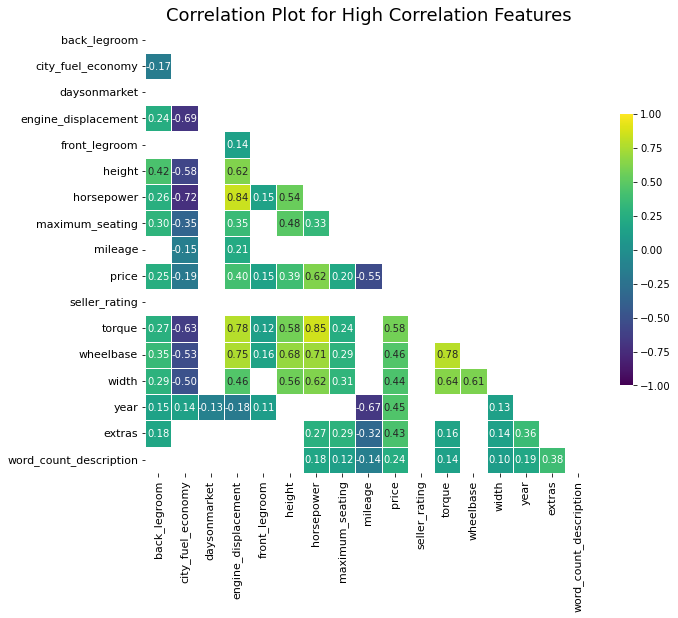

In [263]:
# Ver la matriz de correlación

numerical_features = ["back_legroom", "city_fuel_economy",
                     "daysonmarket", "engine_displacement", "front_legroom", "height",
                     "horsepower",'maximum_seating', "mileage",
                     "price","seller_rating","torque", "wheelbase",
                     "width",'year','extras','word_count_description']

corr_matrix = df[numerical_features].corr()

# Filtar las variables con correlación abosulta de menos del 10%
high_corr = corr_matrix[(corr_matrix > 0.10) | (corr_matrix < -0.10)]

# Filtrar la parte superior de la matriz
mask = np.triu(np.ones_like(high_corr, dtype=bool))

# Establecer los márgenes del gráfico
f, ax = plt.subplots(figsize=(10, 10))

# Dibujar el mapa de calor
sns.heatmap(high_corr, mask=mask, cmap='viridis', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, fmt=".2f", cbar_kws={"shrink": .5})

# Títulos y ejes
plt.title('Correlation Plot for High Correlation Features', size=18)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Guardar la figura
plt.savefig('correlation_plot.png', dpi=300, bbox_inches='tight')

plt.show()

### Porcentaje de datos por fuera del rango intercuartil

In [264]:
# Crear un diccionario para los resultados
outliers_percentage = {}

for feature in numerical_features:
    # CCalcular el rango intercuartil
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Determinar el número de outliers
    num_outliers = ((df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR))).sum()

    # Determinar el porcentaje
    outliers_percentage[feature] = num_outliers / df.shape[0] * 100

# Ver el resultado
for feature, percentage in outliers_percentage.items():
    print(f'{feature}: {percentage:.2f}%')

back_legroom: 2.05%
city_fuel_economy: 2.21%
daysonmarket: 9.02%
engine_displacement: 4.09%
front_legroom: 0.87%
height: 0.15%
horsepower: 0.25%
maximum_seating: 8.77%
mileage: 2.82%
price: 2.57%
seller_rating: 2.70%
torque: 4.73%
wheelbase: 11.09%
width: 3.78%
year: 5.44%
extras: 0.00%
word_count_description: 1.17%


# Para evitar alta dimensionalidad, solo tomar los labels que se repiten más del 1% de las veces en cada categoría, agrupando el resto en "otros"

### Primero vemos cuántas etiquetas tiene cada categoría y cuál es el porcentaje de la que más se repite y de la que menos se repite

In [265]:
# Lista de features categóricos a reducir
categorical_features = ['city', 'model_name', 'make_name', 'body_type','fuel_type',
                        'listing_color','transmission', 'wheel_system_display','engine_type']

# Crear el diccionario para guardar el resultado
results = {}

for feature in categorical_features:
    # Calcular el número de valores únicos
    unique_count = df[feature].nunique()

    # Calcualar el conteo para cada categoría
    value_counts = df[feature].value_counts(normalize=True)

    # Escoger la etuqueta más y menor frecuente
    most_freq_category = value_counts.idxmax()
    most_freq_percentage = value_counts.max() * 100

    least_freq_category = value_counts.idxmin()
    least_freq_percentage = value_counts.min() * 100

    # guardar los resultados en el diccionario
    results[feature] = {
        'unique_count': unique_count,
        'most_freq_category': most_freq_category,
        'most_freq_percentage': most_freq_percentage,
        'least_freq_category': least_freq_category,
        'least_freq_percentage': least_freq_percentage
    }

# Ver los resultados
for feature, result in results.items():
    print(f"{feature}:")
    print(f"  Unique count: {result['unique_count']}")
    print(f"  Most frequent category: {result['most_freq_category']} ({result['most_freq_percentage']:.2f}%)")
    print(f"  Least frequent category: {result['least_freq_category']} ({result['least_freq_percentage']:.2f}%)")
    print()


city:
  Unique count: 4281
  Most frequent category: Houston (1.39%)
  Least frequent category: Fern Park (0.00%)

model_name:
  Unique count: 936
  Most frequent category: F-150 (3.27%)
  Least frequent category: Marauder (0.00%)

make_name:
  Unique count: 66
  Most frequent category: Ford (14.47%)
  Least frequent category: Austin-Healey (0.00%)

body_type:
  Unique count: 9
  Most frequent category: SUV / Crossover (43.37%)
  Least frequent category: Van (0.88%)

fuel_type:
  Unique count: 8
  Most frequent category: Gasoline (88.97%)
  Least frequent category: Propane (0.00%)

listing_color:
  Unique count: 15
  Most frequent category: WHITE (21.84%)
  Least frequent category: PINK (0.01%)

transmission:
  Unique count: 4
  Most frequent category: A (84.41%)
  Least frequent category: Dual Clutch (0.41%)

wheel_system_display:
  Unique count: 5
  Most frequent category: Front-Wheel Drive (45.79%)
  Least frequent category: 4X2 (3.73%)

engine_type:
  Unique count: 34
  Most freque

### Luego, procedemos a agrupar las que se repite menos del 1% en la categoría "otros"

In [247]:
def replace_rare_categories(df, columns, threshold=0.01):
    for col in columns:
        freq = df[col].value_counts(normalize=True)
        rare_labels = freq[freq <= threshold].index
        df[col] = df[col].apply(lambda x: 'Other' if x in rare_labels else x)
    return df

# usage
df_replaced = replace_rare_categories(df, ['city', 'model_name', 'make_name',
                                           'body_type','fuel_type',
                                           'listing_color','transmission',
                                           'wheel_system_display','engine_type'])


In [217]:
df_replaced.shape

(147061, 27)

In [218]:
#Exportar sin encoded para el sistema de recomendación
df_replaced.to_csv('cars_data_no_encoded.csv', index=False)

In [200]:
df_encoded = pd.get_dummies(df_replaced, columns=['city', 'model_name', 'make_name',
                                           'body_type','fuel_type',
                                           'listing_color','transmission',
                                           'wheel_system_display','engine_type'], drop_first=True)


In [201]:
df_encoded.shape

(147061, 99)

In [202]:
df_encoded.columns

Index(['back_legroom', 'city_fuel_economy', 'daysonmarket',
       'engine_displacement', 'franchise_dealer', 'front_legroom', 'height',
       'horsepower', 'maximum_seating', 'mileage', 'price', 'seller_rating',
       'torque', 'wheelbase', 'width', 'year', 'word_count_description',
       'extras', 'city_Other', 'model_name_Accord', 'model_name_Altima',
       'model_name_CR-V', 'model_name_Camry', 'model_name_Civic',
       'model_name_Corolla', 'model_name_Edge', 'model_name_Elantra',
       'model_name_Equinox', 'model_name_Escape', 'model_name_Explorer',
       'model_name_F-150', 'model_name_Fusion', 'model_name_Grand Caravan',
       'model_name_Grand Cherokee', 'model_name_Malibu', 'model_name_Other',
       'model_name_RAV4', 'model_name_Rogue', 'model_name_Sentra',
       'model_name_Silverado 1500', 'make_name_Audi', 'make_name_BMW',
       'make_name_Buick', 'make_name_Cadillac', 'make_name_Chevrolet',
       'make_name_Chrysler', 'make_name_Dodge', 'make_name_Ford',
   

In [203]:
relative_freq = df['model_name'].value_counts(normalize=True)
print(relative_freq)

Other             0.674863
F-150             0.032660
Silverado 1500    0.022848
Escape            0.020046
Equinox           0.019244
1500              0.017544
Rogue             0.016721
Camry             0.016463
Corolla           0.016102
Explorer          0.015449
Grand Cherokee    0.014667
Altima            0.014205
Accord            0.013668
CR-V              0.013131
Malibu            0.012784
Fusion            0.012614
RAV4              0.012097
Civic             0.011777
Sentra            0.011356
Grand Caravan     0.011104
Edge              0.010608
Elantra           0.010050
Name: model_name, dtype: float64


In [204]:
df_encoded = df_encoded.dropna()
df_encoded.shape

(130963, 99)

In [205]:
df_encoded.to_csv('cars_data_encoded.csv', index=False)

In [206]:
df=df_encoded.copy()

# Modelos de Machine learning 

In [207]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)  # Assuming 'price' is your target variable
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Linear Regression

In [208]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Replace 'continuous_feature_cols' with a list of column names or indices of the continuous features
continuous_feature_cols = ['back_legroom', 'city_fuel_economy',
                           'daysonmarket','engine_displacement','front_legroom','height',
                          'horsepower','maximum_seating','mileage','seller_rating','torque',
                          'wheelbase','width','year','word_count_description','extras']

# Create a ColumnTransformer that applies StandardScaler to the continuous features only
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), continuous_feature_cols)
], remainder='passthrough')

# Fit and transform the training data
X_train_scaled = preprocessor.fit_transform(X_train)

# Transform the test data
X_test_scaled = preprocessor.transform(X_test)

# Now you can use the scaled data to fit your Ridge regression model (L2 Regularization)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

Ridge()

In [209]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Cross validation
scores = cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Ridge Regression CV RMSE: {np.sqrt(-scores.mean())}') 


Ridge Regression CV RMSE: 4141.768689626309
Ridge Regression Train RMSE: 4136.515254531641, Train MAPE: 19.773308880349315%
Ridge Regression Test RMSE: 4152.190810487826, Test MAPE: 20.076029672469968%


In [268]:
# RMSE, MAPE & R-squared on Train
from sklearn.metrics import r2_score

y_train_pred = ridge.predict(X_train_scaled)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
r2_train = r2_score(y_train, y_train_pred)
print(f'Ridge Regression Train RMSE: {rmse_train}, Train MAPE: {mape_train}%, Train R-squared: {r2_train}')

# RMSE, MAPE & R-squared on Test
y_test_pred = ridge.predict(X_test_scaled)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
r2_test = r2_score(y_test, y_test_pred)
print(f'Ridge Regression Test RMSE: {rmse_test}, Test MAPE: {mape_test}%, Test R-squared: {r2_test}')

Ridge Regression Train RMSE: 4136.515254531641, Train MAPE: 19.773308880349315%, Train R-squared: 0.8578332772064429
Ridge Regression Test RMSE: 4152.190810487826, Test MAPE: 20.076029672469968%, Test R-squared: 0.8572168801819473


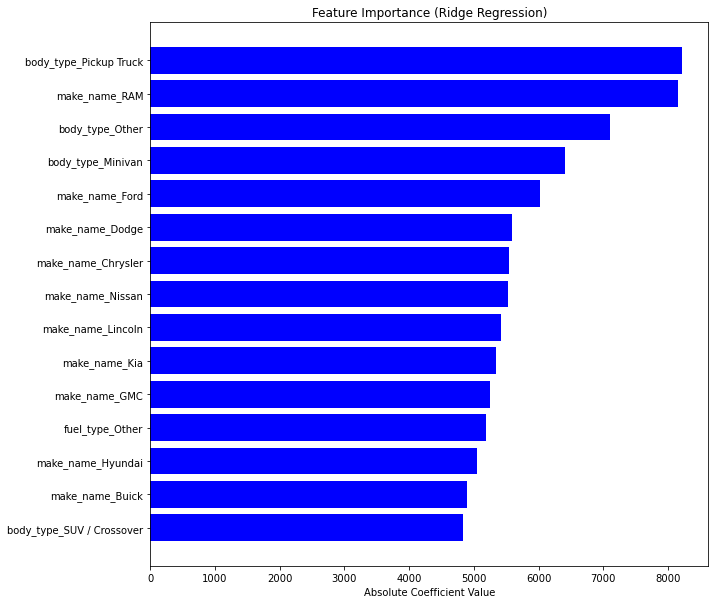

In [266]:
# For Ridge Regression
coefficients = ridge.coef_
indices = np.argsort(np.abs(coefficients))[-15:]  # Get indices of top 15 features

plt.figure(figsize=(10,10))
plt.title('Feature Importance (Ridge Regression)')
plt.barh(range(len(indices)), np.abs(coefficients[indices]), color='b', align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Absolute Coefficient Value')
plt.show()


# Random Forest

In [211]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

rf = RandomForestRegressor(n_estimators=300, random_state=42,max_depth=14,n_jobs=-1,
                           min_samples_split=6,min_samples_leaf=4,max_features="sqrt")
rf.fit(X_train, y_train)

# Cross validation
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Random Forest CV RMSE: {np.sqrt(-scores.mean())}') 

Random Forest CV RMSE: 2855.7571743454964
Random Forest Train RMSE: 2672.6269443603337, Train MAPE: 11.036658197904515%
Random Forest Test RMSE: 2829.246487105499, Test MAPE: 11.743698398997925%


In [269]:
# RMSE, MAPE & R-squared on Train
y_train_pred = rf.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
r2_train = r2_score(y_train, y_train_pred)
print(f'Random Forest Train RMSE: {rmse_train}, Train MAPE: {mape_train}%, Train R-squared: {r2_train}')

# RMSE, MAPE & R-squared on Test
y_test_pred = rf.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
r2_test = r2_score(y_test, y_test_pred)
print(f'Random Forest Test RMSE: {rmse_test}, Test MAPE: {mape_test}%, Test R-squared: {r2_test}')


Random Forest Train RMSE: 2672.6269443603337, Train MAPE: 11.036658197904515%, Train R-squared: 0.940652097203093
Random Forest Test RMSE: 2829.2464871054995, Test MAPE: 11.743698398997921%, Test R-squared: 0.9337075863117351


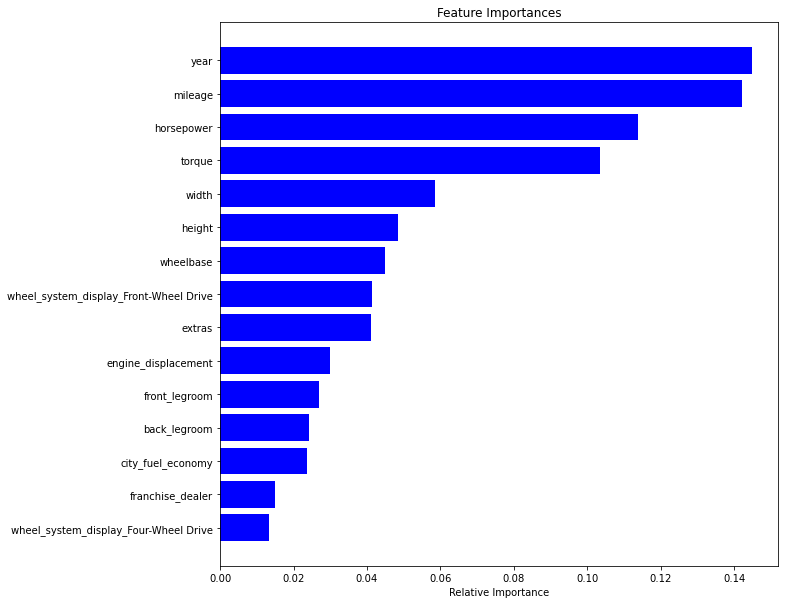

In [213]:
# Plot top 15 features 
importances = rf.feature_importances_
indices = np.argsort(importances)[-15:]  # Get indices of top 15 features

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


### AdaBoost

In [175]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators=250, random_state=42)
ada.fit(X_train, y_train)

# Cross validation
scores = cross_val_score(ada, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'AdaBoost CV RMSE: {np.sqrt(-scores.mean())}') 

# RMSE & MAPE on Train
y_train_pred = ada.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
print(f'AdaBoost Train RMSE: {rmse_train}, Train MAPE: {mape_train}%')

# RMSE & MAPE on Test
y_test_pred = ada.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
print(f'AdaBoost Test RMSE: {rmse_test}, Test MAPE: {mape_test}%')


AdaBoost CV RMSE: 7525.83251196227
AdaBoost Train RMSE: 7694.337836307602, Train MAPE: 37.22842779097852%
AdaBoost Test RMSE: 7701.829696887573, Test MAPE: 37.38488249245499%


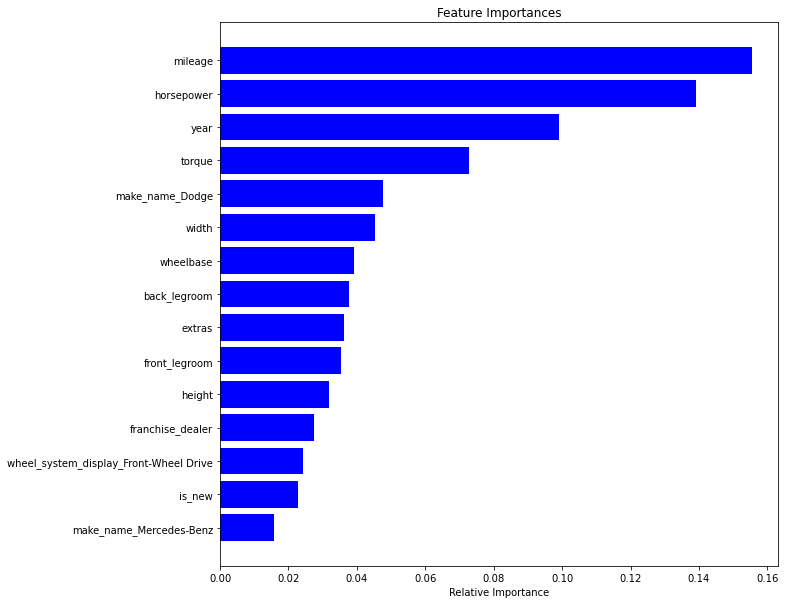

In [179]:
# Plot top 15 features 
importances = ada.feature_importances_
indices = np.argsort(importances)[-15:]  # Get indices of top 15 features
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


### Gradient Boosting Regressor

In [214]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=250, random_state=42,max_features="sqrt")

# Fit the model
gbr.fit(X_train, y_train)

# Cross validation
scores = cross_val_score(gbr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Gradient Boosting CV RMSE: {np.sqrt(-scores.mean())}') 

Gradient Boosting CV RMSE: 2933.422601468429
Gradient Boosting Train RMSE: 2903.8291463940272, Train MAPE: 11.273836072292244%
Gradient Boosting Test RMSE: 2909.183171113783, Test MAPE: 11.296176736071782%


In [270]:
# RMSE, MAPE & R-squared on Train
y_train_pred = gbr.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
r2_train = r2_score(y_train, y_train_pred)
print(f'Gradient Boosting Train RMSE: {rmse_train}, Train MAPE: {mape_train}%, Train R-squared: {r2_train}')

# RMSE, MAPE & R-squared on Test
y_test_pred = gbr.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
r2_test = r2_score(y_test, y_test_pred)
print(f'Gradient Boosting Test RMSE: {rmse_test}, Test MAPE: {mape_test}%, Test R-squared: {r2_test}')

Gradient Boosting Train RMSE: 2903.8291463940272, Train MAPE: 11.273836072292244%, Train R-squared: 0.9299398904874118
Gradient Boosting Test RMSE: 2909.183171113783, Test MAPE: 11.296176736071782%, Test R-squared: 0.9299086549035724


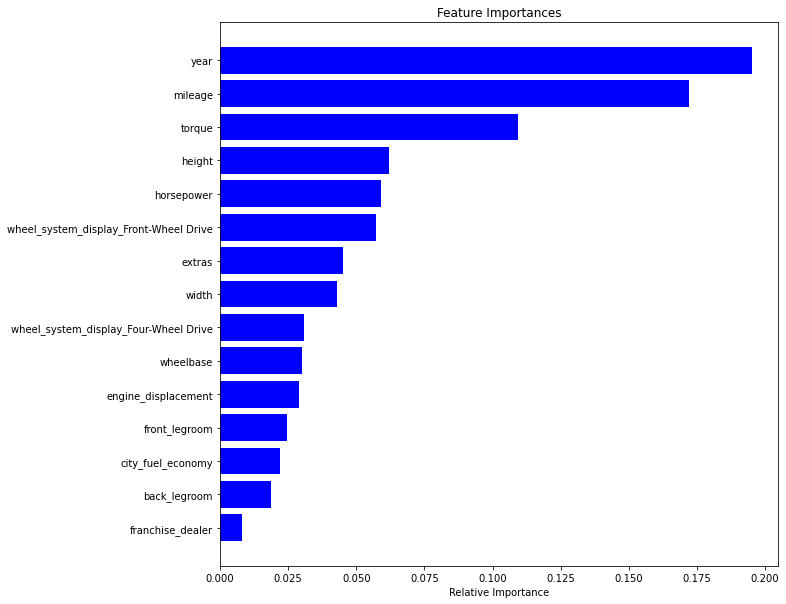

In [215]:
# Plot feature importance
importances = gbr.feature_importances_
indices = np.argsort(importances)[-15:]  # Get indices of top 15 features

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()